# Read data from file and plot
Edited by Evan Varan, lze4

The objective of this Jupyter Notebook is to give brief examples of how to read data from a CSV file and a spreadsheet, and then plot the results.

The data files provided contain temperature samples from a Sunbeam heating pad, in CSV format. There are four sets of temperature samples in each file, taken at the date and time noted for each sampling instance. The four temperature values are from different areas on the heating pad as generally described by the filenames. The sampling rate used was 1 sample per second, for a sampling frequency (fs) of 1 Hz.

# 0. Imports

In [57]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

In [58]:
print('Python: \t {:1d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Pandas: \t',pd.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Pandas: 	 2.2.0rc0
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


# 1. Read CSV (with Pandas)
* CSV files are simple
    * You can edit them and read them
* CSV files are really inefficient
    * Each readable character in the file takes one byte of storage
    * There are non-readable characters on each line that take more space
    * The data all has to be read (or written) and then converted to better formats
* Things to note:
    * Columns
        * Names are assigned according to the list provided
        * Can use whichcols = 'A:F' rather than list of colnames
    * Arguments
        * 'parse_dates' automagically converts date format
        * format inference for 'datetime' objects

In [59]:
filename = 'HP-test-file.csv'
colnames = ['Date', 'Time', 'P1', 'P2', 'P3', 'P4']
datecol = ['Date']

In [60]:
df_csv = pd.read_csv(filename,
                     header = None,
                     names = colnames,
                     parse_dates = datecol)

In [61]:
df_csv

,Date,Time,P1,P2,P3,P4
0,2023-01-14,2:02:07 PM,71.8,71.9,71.6,71.6
1,2023-01-14,2:02:08 PM,71.8,71.9,71.6,71.6
2,2023-01-14,2:02:09 PM,71.8,71.9,71.6,71.6
3,2023-01-14,2:02:10 PM,71.8,71.9,71.6,71.6
4,2023-01-14,2:02:11 PM,71.8,71.9,71.6,71.6
...,...,...,...,...,...,...
3395,2023-01-14,2:58:42 PM,94.5,91.4,91.8,92.2
3396,2023-01-14,2:58:43 PM,94.5,91.4,91.8,92.2
3397,2023-01-14,2:58:44 PM,94.5,91.4,91.8,92.2
3398,2023-01-14,2:58:45 PM,94.5,91.4,91.8,92.2


# 2. Read spreadsheet (with Pandas)
* Note similarities with CSV read
    * Args for filename, column names, date parsing, header, etc.
    * These all work the same as with CSV read
* Note differences with CSV read
    * No inferred format on dates (at least not here)
    * Arguments
        * 'engine' tells which type of spreadsheet
        * sheet selection, skipped rows, etc. are handy

In [62]:
filename = 'HP-test-file.ods'
colnames = ['Date', 'Time', 'P1', 'P2', 'P3', 'P4']
datecol = ['Date']

# New argument
sheetname = 'test_file'

In [63]:
df_odf = pd.read_excel(filename,
                       header = None,
                       names = colnames,
                       parse_dates = datecol,     #vs. infer_datetime_format = True
                       engine = 'odf',
                       sheet_name = sheetname,
                       skiprows = 0)

In [64]:
df_odf

,Date,Time,P1,P2,P3,P4
0,2023-01-14,2:02:07 PM,71.8,71.9,71.6,71.6
1,2023-01-14,2:02:08 PM,71.8,71.9,71.6,71.6
2,2023-01-14,2:02:09 PM,71.8,71.9,71.6,71.6
3,2023-01-14,2:02:10 PM,71.8,71.9,71.6,71.6
4,2023-01-14,2:02:11 PM,71.8,71.9,71.6,71.6
...,...,...,...,...,...,...
3395,2023-01-14,2:58:42 PM,94.5,91.4,91.8,92.2
3396,2023-01-14,2:58:43 PM,94.5,91.4,91.8,92.2
3397,2023-01-14,2:58:44 PM,94.5,91.4,91.8,92.2
3398,2023-01-14,2:58:45 PM,94.5,91.4,91.8,92.2


# Concat files - Added by Evan
* Combined both csv and ods file into one.
* Running statistics on the new file. (min,max,average,mode,median)

In [65]:
result  = pd.concat([df_csv,df_odf])
result

,Date,Time,P1,P2,P3,P4
0,2023-01-14,2:02:07 PM,71.8,71.9,71.6,71.6
1,2023-01-14,2:02:08 PM,71.8,71.9,71.6,71.6
2,2023-01-14,2:02:09 PM,71.8,71.9,71.6,71.6
3,2023-01-14,2:02:10 PM,71.8,71.9,71.6,71.6
4,2023-01-14,2:02:11 PM,71.8,71.9,71.6,71.6
...,...,...,...,...,...,...
3395,2023-01-14,2:58:42 PM,94.5,91.4,91.8,92.2
3396,2023-01-14,2:58:43 PM,94.5,91.4,91.8,92.2
3397,2023-01-14,2:58:44 PM,94.5,91.4,91.8,92.2
3398,2023-01-14,2:58:45 PM,94.5,91.4,91.8,92.2


In [66]:
stats_concat_csv = result.copy(deep = True)
stats_concat_csv.drop(columns=['Date', 'Time'], inplace=True)

min_concat_values = stats_concat_csv.min()
print(min_concat_values)

P1    71.8
P2    71.9
P3    71.6
P4    71.6
dtype: float64


In [67]:
max_concat_values = stats_concat_csv.max()
print(max_concat_values)

P1    176.4
P2    162.4
P3    155.3
P4    189.1
dtype: float64


In [68]:
avg_concat_values = stats_concat_csv.mean()
print(avg_concat_values)

P1    125.928147
P2    116.978147
P3    116.905706
P4    126.846853
dtype: float64


In [69]:
mode_concat_values = stats_concat_csv.mode()
print(mode_concat_values)

      P1     P2     P3     P4
0  145.3  129.4  130.7  142.2


In [70]:
median_concat_values = stats_concat_csv.median()
print(median_concat_values)

P1    126.4
P2    116.8
P3    117.6
P4    125.9
dtype: float64


# 3. Make plots
Couple of things to notice here:
* Messed up labels on horizontal axis ('Time' column is still text format, not 'datetime' objects)
* No horizontal or vertical axes, no grid, no useful ticks, etc
* These samples really should be displayed in 'stem' format, but it would be ugly

## 3.a Single data sequence from CSV frame

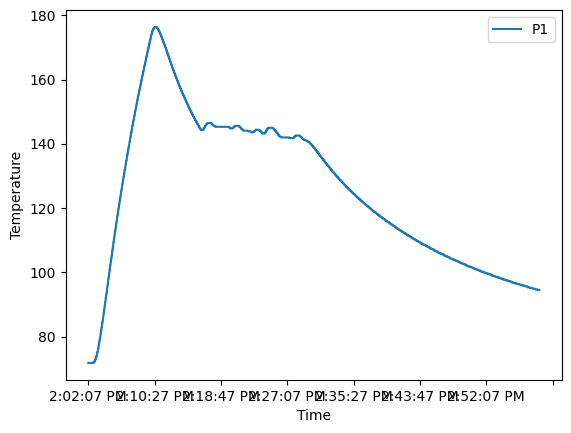

In [71]:
df_csv.plot(x='Time', y='P1', 
            xlabel='Time', 
            ylabel='Temperature',)
plt.show()

## 3.b Single data sequence from spreadsheet frame

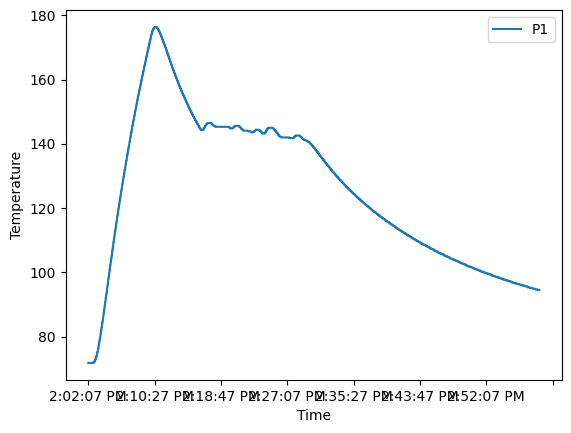

In [72]:
df_odf.plot(x='Time', y='P1', 
            xlabel='Time', 
            ylabel='Temperature',)
plt.show()

## 3.c Single sequence from both frames on one graph
Things to notice:
* Quick, one-shot plots (as previous) didn't return graphing objects to re-use
* This time, we create the 'figure' and the 'axes' so we can re-use them
* The syntax of the plot command is similar to previous, but useful to compare

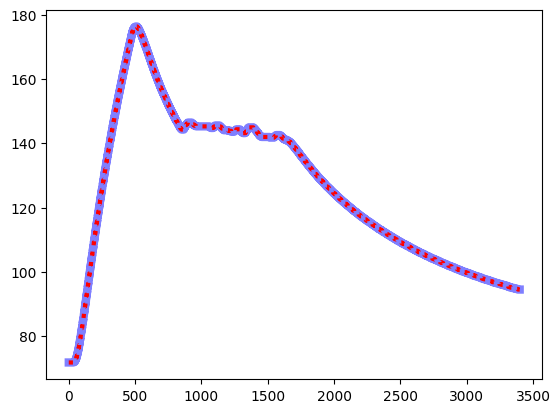

In [73]:
fig = plt.figure()
ax = plt.subplot(111)
df_csv['P1'].plot(ax=ax, color='blue', linestyle='-', linewidth=6, alpha=0.5)
df_odf['P1'].plot(ax=ax, color='red', linestyle=':', linewidth=3)
plt.show()

# 4. Fiddle with dataframe
This section just shows several ways to use Pandas in tweaking the values and structure of the data frame.  We'll use just the CSV frame since they both have the same data.

## 4.a Date and Time values
This creates new columns with specified names by converting data in existing columns to 'datetime' objects



Added by Evan
-----------------
* Puts the time axis in seconds
* Re-displayed both graphs with a cleaned up the time axis
* Creates a new DeltaT column that shows the change in the Time2 column.
* Added mean, mode, median, max, and min calculations of the csv

In [74]:
df_csv['Date2'] = pd.to_datetime(df_csv['Date']).dt.date
df_csv['Time2'] = pd.to_timedelta(df_csv['Time']).dt.total_seconds()
df_csv['DeltaT'] = df_csv['Time2'].shift(-1) - df_csv['Time2']
df_csv


,Date,Time,P1,P2,P3,P4,Date2,Time2,DeltaT
0,2023-01-14,2:02:07 PM,71.8,71.9,71.6,71.6,2023-01-14,7327.0,1.0
1,2023-01-14,2:02:08 PM,71.8,71.9,71.6,71.6,2023-01-14,7328.0,1.0
2,2023-01-14,2:02:09 PM,71.8,71.9,71.6,71.6,2023-01-14,7329.0,1.0
3,2023-01-14,2:02:10 PM,71.8,71.9,71.6,71.6,2023-01-14,7330.0,1.0
4,2023-01-14,2:02:11 PM,71.8,71.9,71.6,71.6,2023-01-14,7331.0,1.0
...,...,...,...,...,...,...,...,...,...
3395,2023-01-14,2:58:42 PM,94.5,91.4,91.8,92.2,2023-01-14,10722.0,1.0
3396,2023-01-14,2:58:43 PM,94.5,91.4,91.8,92.2,2023-01-14,10723.0,1.0
3397,2023-01-14,2:58:44 PM,94.5,91.4,91.8,92.2,2023-01-14,10724.0,1.0
3398,2023-01-14,2:58:45 PM,94.5,91.4,91.8,92.2,2023-01-14,10725.0,1.0


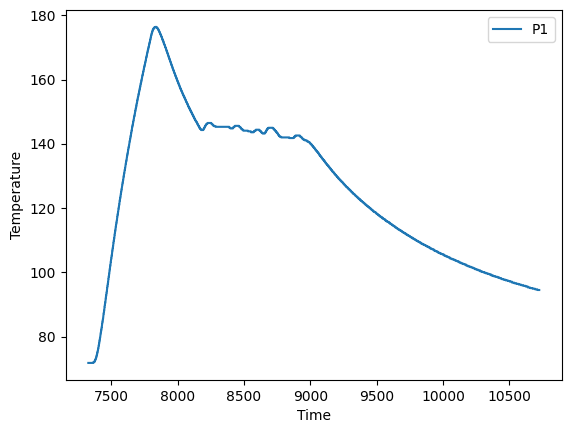

In [75]:
df_csv.plot(x='Time2', y='P1', 
            xlabel='Time', 
            ylabel='Temperature',)
plt.show()

In [76]:
df_odf['Time2'] = pd.to_timedelta(df_odf['Time']).dt.total_seconds()
df_odf['DeltaT'] = df_odf['Time2'].shift(-1) - df_csv['Time2']
df_odf

,Date,Time,P1,P2,P3,P4,Time2,DeltaT
0,2023-01-14,2:02:07 PM,71.8,71.9,71.6,71.6,7327.0,1.0
1,2023-01-14,2:02:08 PM,71.8,71.9,71.6,71.6,7328.0,1.0
2,2023-01-14,2:02:09 PM,71.8,71.9,71.6,71.6,7329.0,1.0
3,2023-01-14,2:02:10 PM,71.8,71.9,71.6,71.6,7330.0,1.0
4,2023-01-14,2:02:11 PM,71.8,71.9,71.6,71.6,7331.0,1.0
...,...,...,...,...,...,...,...,...
3395,2023-01-14,2:58:42 PM,94.5,91.4,91.8,92.2,10722.0,1.0
3396,2023-01-14,2:58:43 PM,94.5,91.4,91.8,92.2,10723.0,1.0
3397,2023-01-14,2:58:44 PM,94.5,91.4,91.8,92.2,10724.0,1.0
3398,2023-01-14,2:58:45 PM,94.5,91.4,91.8,92.2,10725.0,1.0


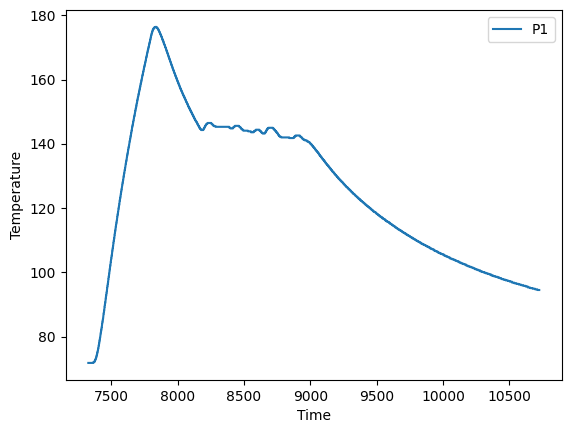

In [77]:
df_odf.plot(x='Time2', y='P1', 
            xlabel='Time', 
            ylabel='Temperature',)
plt.show()

In [78]:
##Printing the min

stats_csv = df_csv.copy()
stats_csv.drop(columns=['Date', 'Time', 'Time2', 'Date2','DeltaT'], inplace=True)

min_values = stats_csv.min()
print(min_values)

P1    71.8
P2    71.9
P3    71.6
P4    71.6
dtype: float64


In [79]:
max_values = stats_csv.max()
print(max_values)

P1    176.4
P2    162.4
P3    155.3
P4    189.1
dtype: float64


In [80]:
##Printing the avg
avg_values = stats_csv.mean()
print(avg_values)

P1    125.928147
P2    116.978147
P3    116.905706
P4    126.846853
dtype: float64


In [81]:
##Printing the mode
mode_values = stats_csv.mode()
print(mode_values)

      P1     P2     P3     P4
0  145.3  129.4  130.7  142.2


In [82]:
##Printing the median
median_values = stats_csv.median()
print(median_values)

P1    126.4
P2    116.8
P3    117.6
P4    125.9
dtype: float64


## 4.b Get rid of useless stuff
Things to note:
* The 'drop' function can kill rows or columns, but strangely not entire data frames
* The 'dropna' function gets rid of rows or columns with 'Nan' (garbage) values
* The 'inplace' argument can be useful to make sure operations happen on the data you intend

In [83]:
df_odf = []
df_csv.drop(columns=['Date', 'Time', 'Date2'], inplace=True)
df_csv.dropna(inplace = True)
df_csv

,P1,P2,P3,P4,Time2,DeltaT
0,71.8,71.9,71.6,71.6,7327.0,1.0
1,71.8,71.9,71.6,71.6,7328.0,1.0
2,71.8,71.9,71.6,71.6,7329.0,1.0
3,71.8,71.9,71.6,71.6,7330.0,1.0
4,71.8,71.9,71.6,71.6,7331.0,1.0
...,...,...,...,...,...,...
3394,94.5,91.4,92.0,92.4,10721.0,1.0
3395,94.5,91.4,91.8,92.2,10722.0,1.0
3396,94.5,91.4,91.8,92.2,10723.0,1.0
3397,94.5,91.4,91.8,92.2,10724.0,1.0


# 5. Plot all sequences from a frame on a single axis

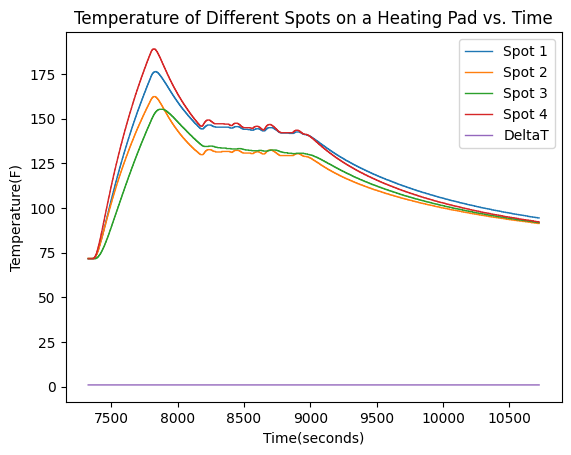

In [84]:
plot = df_csv.plot(x='Time2', lw =1, title= 'Temperature of Different Spots on a Heating Pad vs. Time')
plot.set_xlabel('Time(seconds)')
plot.set_ylabel('Temperature(F)')
plot.legend(['Spot 1', 'Spot 2', 'Spot 3', 'Spot 4', 'DeltaT'],loc = 'upper right')
plt.show()

# 6. Useful Things to Do
* Data frame
    * Figure out proper way to get the time axis in "seconds"
    * Subtract subsequent rows for "delta t"
    * Compute statistics (min, avg, etc.)
* Plots
    * Pretty up the plot (eg. correct axes, ticks, divisions, etc.)
    * Improve the legend with curve names
    * Add annotations
* Multiple files
    * Read several CSV or spreadsheet files
    * Combine all data and do useful things (eg. average of P1 values, statistics of each curve, etc)